# Airline Dataset

In [1072]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error,r2_score,accuracy_score,confusion_matrix

## read csv file 

In [1073]:
df=pd.read_csv("Airline Dataset.csv")

In [1074]:
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [1075]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  int64 
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(2), object(13)
memory usage

In [1076]:
df.shape

(98619, 15)

### cleaning our data
##### data doesnt contain null or dup values , we need just fix dtype of Departure Date column 

In [1077]:
df.isnull().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

In [1078]:
df.shape

(98619, 15)

In [1079]:
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

### Make some analysis 

#### Describe Data

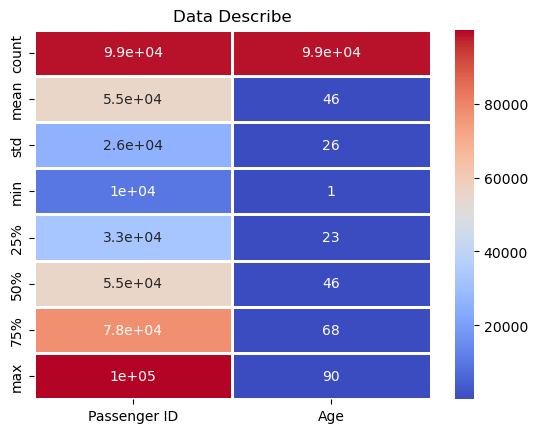

In [1080]:
plt.title('Data Describe')
sns.heatmap(df.describe(),cmap='coolwarm',annot=True,linewidths=1)
plt.show()

#### check correlation

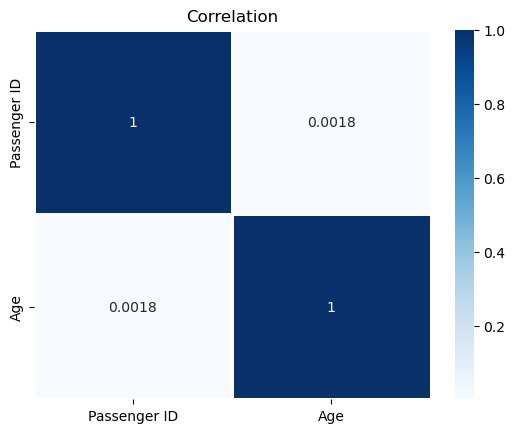

In [1081]:
plt.title('Correlation')
sns.heatmap(df.corr(),cmap='Blues',annot=True,linewidths=2)
plt.show()

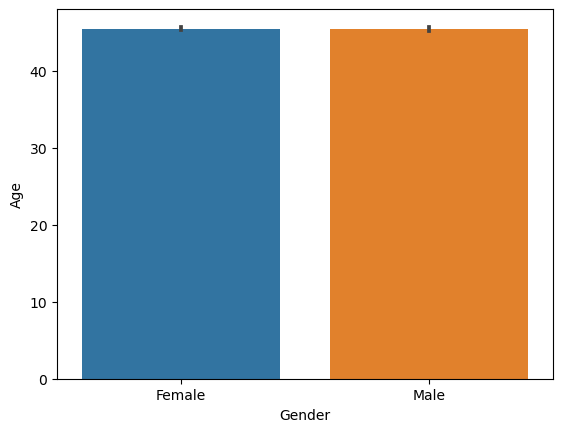

In [1082]:
sns.barplot(x='Gender',y='Age',data=df)
plt.show()

In [1083]:
df['Continents'].value_counts().reset_index().rename(columns={'index': 'Continents','Continents':'count'})

,Continents,count
0,North America,32033
1,Asia,18637
2,Oceania,13866
3,Europe,12335
4,Africa,11030
5,South America,10718


In [1084]:
df['Nationality'].value_counts().nlargest(10).reset_index().rename(columns={'index': 'Nationality','Nationality':'count'})

,Nationality,count
0,China,18317
1,Indonesia,10559
2,Russia,5693
3,Philippines,5239
4,Brazil,3791
5,Portugal,3299
6,Poland,3245
7,France,2907
8,Sweden,2397
9,United States,2105


In [1085]:
print('The average age of the passengers : ',int(np.mean(df['Age'])))

The average age of the passengers :  45


In [1086]:
print('Number of flights completed without cancellation or Delayed :',df[df['Flight Status']=='On Time'].value_counts().sum())
print('Number of delayed flights :',df[df['Flight Status']=='Delayed'].value_counts().sum())
print('Number of flights cancelled :',df[df['Flight Status']=='Cancelled'].value_counts().sum())

Number of flights completed without cancellation or Delayed : 32846
Number of delayed flights : 32831
Number of flights cancelled : 32942


In [1087]:
overall_time_performance = df[df['Flight Status'].str.contains('On Time',case=True)]
print('overall_time_performance = ',(overall_time_performance['Flight Status'].value_counts().sum()/df['Flight Status'].value_counts().sum())*100)

overall_time_performance =  33.30595524189051


In [1088]:
df.loc[df['Flight Status'] == 'On Time', 'Airport Name'].value_counts().nlargest(5).reset_index().rename(columns={'index': 'Airport Name','Airport Name':'count'})

,Airport Name,count
0,San Pedro Airport,17
1,Santa Ana Airport,15
2,Mercer County Airport,13
3,OR Tambo International Airport,13
4,Böblingen Flugfeld,13


In [1089]:
df.loc[df['Flight Status'] == 'Cancelled', 'Airport Name'].value_counts().nlargest(5).reset_index().rename(columns={'index': 'Airport Name','Airport Name':'count'})

,Airport Name,count
0,Yangzhou Taizhou Airport,13
1,Böblingen Flugfeld,13
2,Mae Hong Son Airport,13
3,Kiunga Airport,13
4,Danilo Atienza Air Base,12


In [1090]:
print('Number Of Pilot: ',df['Pilot Name'].value_counts().sum())

Number Of Pilot:  98619


In [1091]:
df['Airport Name'].nunique()

9062

In [1092]:
print('Most day of the year flights \n')
df['Departure Date'].value_counts().nlargest(5).reset_index().rename(columns={'index': 'Departure Date','Departure Date':'count'})

Most day of the year flights 



,Departure Date,count
0,2022-07-22,325
1,2022-05-26,314
2,2022-10-16,310
3,2022-08-15,310
4,2022-11-25,310


In [1093]:
month_counts = df['Departure Date'].dt.month.value_counts().nlargest(1).index[0]
print('The month with the most flights:', month_counts)

day_month_counts = df['Departure Date'].dt.day.value_counts().nlargest(1).index[0]
print('The day of the month with the most flights:', day_month_counts)

most_flights_day_week = df['Departure Date'].dt.day_of_week.value_counts().nlargest(1).index[0]
weekday_name = pd.Series(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
most_flights_day_name = weekday_name.iloc[most_flights_day_week]
print('The day of the week with the most flights:', most_flights_day_name)

The month with the most flights: 8
The day of the month with the most flights: 13
The day of the week with the most flights: Sunday


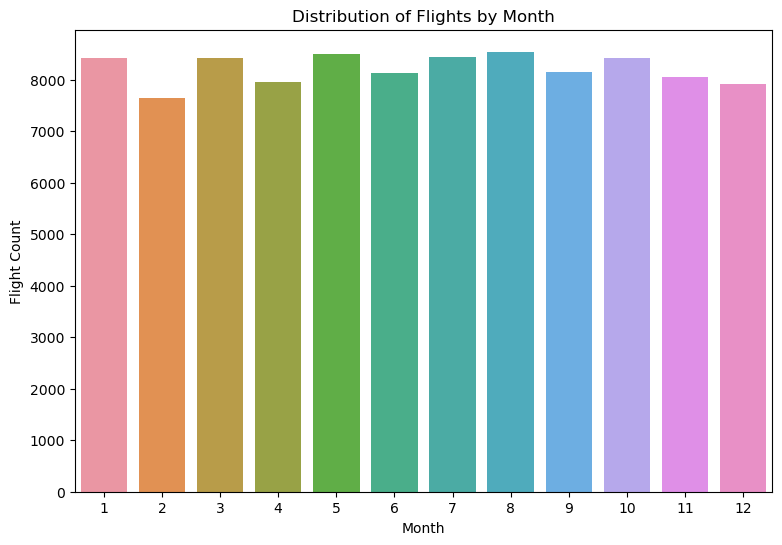

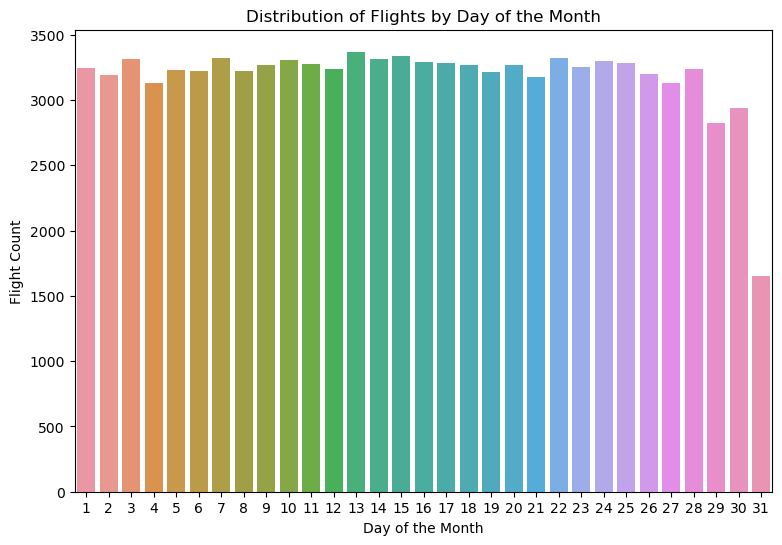

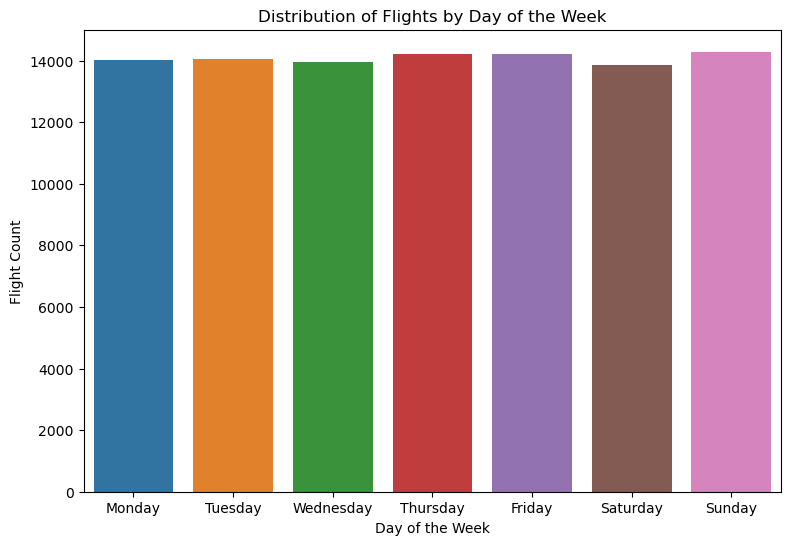

In [1094]:

plt.figure(figsize=(9, 6))
sns.countplot(x=df['Departure Date'].dt.month)
plt.xlabel('Month')
plt.ylabel('Flight Count')
plt.title('Distribution of Flights by Month')
plt.show()

plt.figure(figsize=(9, 6))
sns.countplot(x=df['Departure Date'].dt.day)
plt.xlabel('Day of the Month')
plt.ylabel('Flight Count')
plt.title('Distribution of Flights by Day of the Month')
plt.show()

plt.figure(figsize=(9, 6))
sns.countplot(x=df['Departure Date'].dt.day_of_week)
plt.xlabel('Day of the Week')
plt.ylabel('Flight Count')
plt.title('Distribution of Flights by Day of the Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

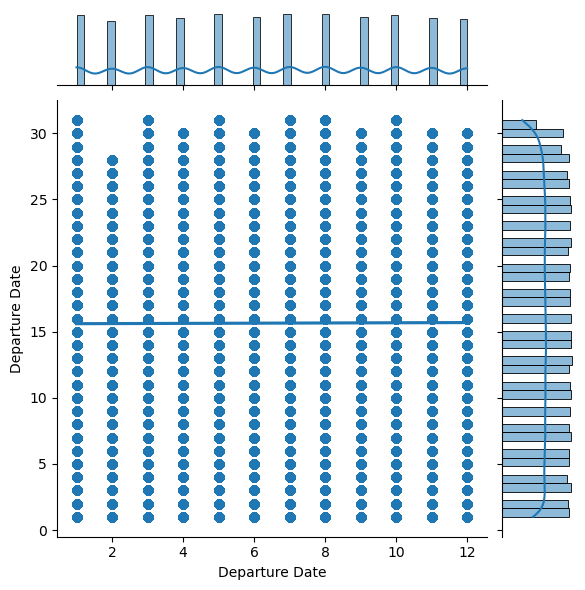

In [1095]:
sns.jointplot(x=df['Departure Date'].dt.month,y=df['Departure Date'].dt.day,data=df,kind='reg')
plt.show()

#### Now encoding data to get more analysis

In [1096]:
df['Departure Date'] = pd.to_datetime(df['Departure Date'])
df['Day_of_Week'] = df['Departure Date'].dt.dayofweek
df['Month'] = df['Departure Date'].dt.month

In [1097]:
features = ['Airport Name','Airport Country Code','Country Name','Airport Continent','Continents','Arrival Airport','Day_of_Week', 'Month']
x = df[features].copy()
label_encoders = {}
for feature in features:
    le = LabelEncoder()
    x.loc[:, feature] = le.fit_transform(x[feature])
    label_encoders[feature] = le

scaler = StandardScaler()
x = scaler.fit_transform(x)
y = df['Flight Status'].apply(lambda x: 1 if x == 'Delayed' else 0)

In [1098]:
print('x_shape : ',x.shape,'\ny_shape : ',y.shape)

x_shape :  (98619, 8) 
y_shape :  (98619,)


#### Now build our models

In [1099]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [1100]:
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x_train)
lin_reg=LinearRegression()
lin_reg.fit(x_poly,y_train)

LinearRegression()

In [1101]:
x_train = scaler.fit_transform(x_train)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [1102]:
y_pred_1=lin_reg.predict(poly_reg.fit_transform(x_test))

In [1103]:
y_pred_2=log_reg.predict(x_test)

In [1104]:
#Accuracy of polynomial regression
mse = mean_squared_error(y_test, y_pred_1)
rmse = mean_squared_error(y_test, y_pred_1, squared=False)
mae = mean_absolute_error(y_test, y_pred_1)
r2 = r2_score(y_test, y_pred_2)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R2:', r2)

MSE: 0.22323733753125294
RMSE: 0.47247998638170163
MAE: 0.4446882434943859
R2: -0.5042708968883465


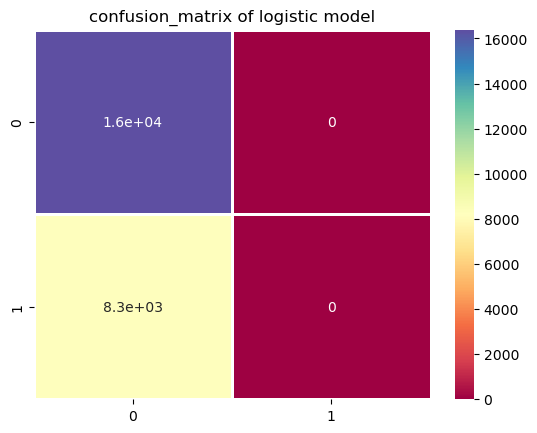

In [1105]:
plt.title('confusion_matrix of logistic model')
cm=confusion_matrix(y_test,y_pred_2)
sns.heatmap(cm,cmap='Spectral',annot=True,linewidths=1)
plt.show()

In [1106]:
#Accuracy of logistic model
print(classification_report(y_test,y_pred_2))
print('Accuracy = ',accuracy_score(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80     16390
           1       0.00      0.00      0.00      8265

    accuracy                           0.66     24655
   macro avg       0.33      0.50      0.40     24655
weighted avg       0.44      0.66      0.53     24655

Accuracy =  0.6647738795376191
